In [ ]:
# 2023.5.1
# reconstructed code 

# no random init
# poly function

In [2]:
import os

cuda_device = '2'

os.environ["CUDA_VISIBLE_DEVICES"] = cuda_device
os.environ['CUBLAS_WORKSPACE_CONFIG']=':4096:8'

import torch

import numpy as np

from para_init import parameters, setup_seed
from permutation import permutation_train

# import warnings
# warnings.filterwarnings('ignore')


In [ ]:
import torch.multiprocessing as mp
num_processes = 10

width_vector = [80, 160, 320, 640]

# generate a 2-dimensional matrix to hold the results in (i,j)
# result_matrix = torch.zeros((len(width_vector), 10))
result_matrix = np.zeros((len(width_vector), 10, 2))

i = 0

for width in width_vector:
    
    setup_seed(2022)
    
    shared_params = parameters()
    
    shared_params.width = width
    shared_params.adjust_scale = 0
    shared_params.batch_size = 8
    
#     print(shared_params.width)
            
    if __name__ == "__main__":
        
        mp.set_start_method('spawn', force=True)
        
        manager = mp.Manager()
        results_queue = manager.Queue()

        mp.spawn(permutation_train, args=(shared_params, results_queue), nprocs=num_processes, join=True)
        
#         while not results_queue.empty():
#             result = results_queue.get()
#             print(f"Result: {result}")
        
        while not results_queue.empty():
            (idx, (error, error_infty)) = results_queue.get()
#             print(result[0])
#             print(f"Index: {idx}, error: {error}, error_infty: {error_infty}")
            result_matrix[i, idx, :] = [error, error_infty]
    

    i += 1


    

Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!


In [ ]:
print(result_matrix)

[[[1.07860402e-03 5.52423000e-02]
  [5.78694278e-03 1.41937256e-01]
  [3.68417427e-03 1.21636666e-01]
  [3.35821020e-03 1.21778131e-01]
  [6.95888512e-03 1.35900021e-01]
  [5.78724733e-03 1.24120981e-01]
  [4.95974254e-03 1.60140216e-01]
  [1.49881945e-03 9.71714258e-02]
  [3.41649842e-03 1.30349576e-01]
  [1.77185715e-03 9.10702944e-02]]

 [[2.49117706e-03 1.17199719e-01]
  [1.56143995e-03 8.19346905e-02]
  [2.92316568e-03 1.15616560e-01]
  [2.01116828e-03 7.12949187e-02]
  [3.56087112e-03 9.95049477e-02]
  [7.68419704e-04 4.49597538e-02]
  [3.16427881e-03 1.16674900e-01]
  [2.35466240e-03 8.58139992e-02]
  [1.04233786e-03 7.39884377e-02]
  [2.75767804e-03 1.19072080e-01]]

 [[1.40512770e-04 2.88281739e-02]
  [3.00395535e-04 3.94151807e-02]
  [1.33822940e-03 8.43261480e-02]
  [4.31227934e-04 3.48472446e-02]
  [5.34998195e-04 5.29156923e-02]
  [7.80380156e-04 5.88516593e-02]
  [9.64007413e-05 2.31715366e-02]
  [5.60060325e-05 2.08187550e-02]
  [1.35039585e-03 8.94365311e-02]
  [1.09073

(3, 10, 2)
0.11372585327652428
<class 'numpy.ndarray'>
0.0
[0.00327039 0.00205454 0.00038974]
[0.11372585 0.08901539 0.04508864]
y_min: [1.07860402e-03 7.68419704e-04 5.60060325e-05]
y_max: [0.00695889 0.00356087 0.0013504 ]
[[0.00219178 0.00128612 0.00033374]
 [0.0036885  0.00150633 0.00096065]]


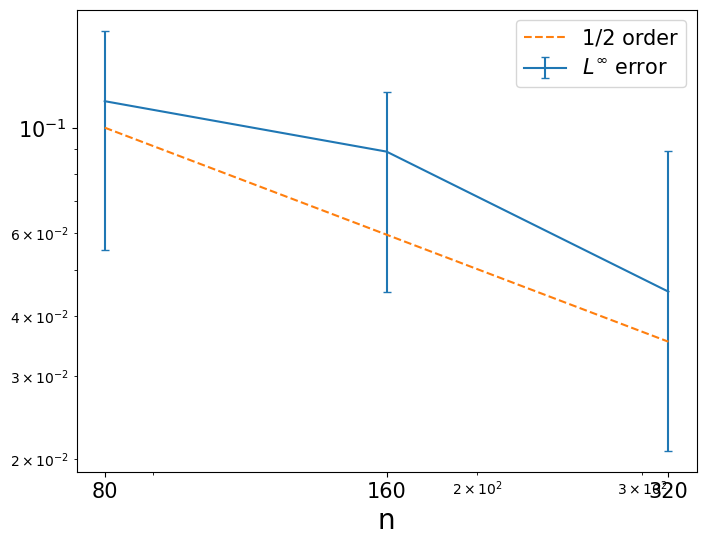

In [ ]:
from statistics import geometric_mean
import matplotlib.pyplot as plt

x = width_vector

print(np.shape(result_matrix))

print(geometric_mean(result_matrix[0,:,1]))

# print(np.average(result_matrix, axis=1))

mean = np.zeros(int(len(x)))
mean_inf = np.zeros(int(len(x)))

print(type(mean))

print(mean[0])

for i in range(len(x)):
    mean[i] = geometric_mean(result_matrix[i,:,0])
    mean_inf[i] = geometric_mean(result_matrix[i,:,1])

# mean = np.average(result_matrix, axis=1)

print(mean)
print(mean_inf)

# mean = geometric_mean(result_matrix, axis=1)

y_max = np.max(result_matrix[:,:,0], axis = 1)
y_min = np.min(result_matrix[:,:,0], axis = 1)

y_min_inf = np.min(result_matrix[:,:,1], axis = 1)
y_max_inf = np.max(result_matrix[:,:,1], axis = 1)

yerr = np.abs(np.vstack((y_min, y_max)) - mean)

print('y_min: '+str(y_min))
print('y_max: '+str(y_max))
print(yerr)

yerr2 = np.abs(np.vstack((y_min_inf, y_max_inf)) - mean_inf)

start_point = 1E-1

x_ref = [x[0], x[-1]]
y_ref = [start_point, start_point/np.sqrt(np.power(2,len(x)))]

# print(np.max(result_matrix, axis = 1))
# print(np.min(result_matrix, axis = 1))

ax = plt.figure(figsize=(8, 6))
# plt.errorbar(x, mean, yerr=yerr, capsize = 3, label='MSE error')
plt.errorbar(x, mean_inf, yerr=yerr2, capsize = 3, label='$L^\infty$ error')
plt.plot(x_ref, y_ref, linestyle='--', label='1/2 order')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('n', size=20)
# plt.ylabel('Loss', size=15)
plt.legend(fontsize=15)
# ax.set_xticks(x)
plt.xticks(x, x, fontsize=15)
plt.yticks(fontsize=15)
# ax()
plt.savefig('plot.pdf', bbox_inches='tight')
plt.show()